<a href="https://colab.research.google.com/github/SaifuliAnna/ML_DataScience/blob/main/PyTorch_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Using torchvision, it’s very easy to load CIFAR10

import torch
import torchvision
import torchvision.transforms as transforms

Наступний код визначає послідовність перетворень (`transform`) для попередньої підготовки зображень перед їх подачею до нейромережі. Перетворення використовуються для нормалізації та конвертації даних в підходящий для нейромережі формат. Давайте розглянемо його крок за кроком:

1. **`transforms.ToTensor()`**: Це перетворення конвертує зображення з формату `PIL` (Python Imaging Library) у тензор PyTorch. Тензор - це основна структура даних для роботи з нейромережами в PyTorch.

2. **`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`**: Це нормалізаційне перетворення. Воно нормалізує значення каналів кольору зображення. Параметр `(0.5, 0.5, 0.5)` вказує на середнє значення для кожного каналу (червоний, зелений та синій), а `(0.5, 0.5, 0.5)` вказує на стандартне відхилення для кожного каналу. Це допомагає привести значення пікселів до діапазону від -1 до 1, що сприяє кращому навчанню нейромережі.

`transforms.Compose` дозволяє вказати послідовність перетворень, які будуть застосовані до зображення в заданому порядку. У вашому випадку, `transforms.ToTensor()` виконується першим, а потім `transforms.Normalize()`.

Ці перетворення допомагають приготувати дані для навчання, так як нейромережі часто працюють з тензорами та потребують відносно нормалізованих даних для оптимальної продуктивності.

In [3]:
# The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

Наступний код створює два набори даних (навчальний та тестовий) для навчання і валідації нейромережі на прикладі датасету CIFAR-10. Давайте розглянемо кожний крок цього коду:

1. **Створення навчального набору даних (`trainset`)**:

   - `root='./data'`: Це шлях, за яким зберігатимуться дані. Зазвичай, дані завантажуються та зберігаються у папці `./data`.
   - `train=True`: Вказує, що це навчальний набір даних.
   - `download=True`: Якщо `True`, датасет буде завантажено, якщо він ще не був завантажений.
   - `transform=transform`: Використовується об'єкт `transform`, який був визначений раніше, для попереднього підготування даних перед навчанням.

2. **Створення навчального даталоадера (`trainloader`)**:
   
   - `batch_size=4`: Вказує розмір батча (кількість прикладів), який буде використовуватися під час навчання.
   - `shuffle=True`: Вказує, що дані в батчах будуть перемішуватися перед кожною епохою. Це допомагає нейромережі отримати більш різноманітні та репрезентативні дані.
   - `num_workers=2`: Кількість робочих потоків, які використовуються для завантаження даних у фоновому режимі.

3. **Створення тестового набору даних (`testset`)**:

   - `root='./data'`: Також вказує шлях для зберігання тестових даних.
   - `train=False`: Вказує, що це тестовий набір даних.
   - `download=True`: Знову, якщо `True`, датасет буде завантажено, якщо він ще не був завантажений.
   - `transform=transform`: Використовується той самий об'єкт `transform`, який був визначений раніше, для підготування тестових даних.

4. **Створення тестового даталоадера (`testloader`)**:
   
   - Тут такі ж параметри, які були вказані для навчального даталоадера: `batch_size=4`, `shuffle=False` (бо тестові дані не потребують перемішування) та `num_workers=2`.

Отже, в результаті цього коду ми отримуєте два набори даних (`trainloader` та `testloader`), які вже підготовлені для використання у навчанні та тестуванні нейромережі.

In [19]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
print(f"trainset: {trainset}")
print(f"trainloader: {trainloader}")
print(f"testset: {testset}")
print(f"testloader: {testloader}")

trainset: Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
trainloader: <torch.utils.data.dataloader.DataLoader object at 0x7e89340adbd0>
testset: Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
testloader: <torch.utils.data.dataloader.DataLoader object at 0x7e89340ace80>


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Наступний код працює з даними та мітками з першого батча навчального набору даних (`trainloader`) і виводить деяку візуалізацію для демонстрації. Давайте розглянемо його крок за кроком:

1. **Отримання даних та міток**: `dataiter = iter(trainloader)` створює ітератор для навчального набору даних, і `images, labels = next(dataiter)` отримує перший батч даних та міток з навчального набору.

2. **Відображення зображень**: `imshow(torchvision.utils.make_grid(images))` - ця функція використовується для відображення зображень на екрані. `torchvision.utils.make_grid(images)` розташовує зображення в сітці для більш чіткого відображення.

3. **Виведення міток**: `print(' '.join('%5s' % classes[labels[j]] for j in range(4)))` - цей рядок виводить перші чотири мітки зображень, які відповідають класам з відповідного набору класів (`classes`). `classes` припустимо містить назви класів для вашого завдання класифікації.

Цей код допомагає нам візуалізувати деякі приклади даних з навчального набору та їх відповідні мітки, щоб перевірити, як виглядають дані та чи відповідають мітки очікуваним класам. Така візуалізація може допомогти нам зрозуміти, як дані виглядають і як нейромережа може їх інтерпретувати під час навчання.

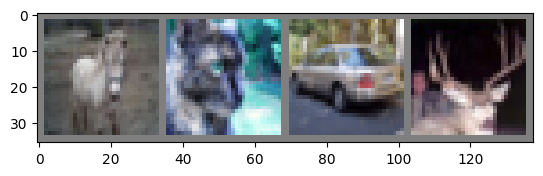

horse   cat   car  deer


In [10]:
# get some random training images

dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


Наступний код визначає архітектуру нейромережі за допомогою бібліотеки PyTorch:

1. **Імпорт бібліотек**: Імпорт двох модулів `nn` та `nn.functional`, які входять до бібліотеки PyTorch. Модуль `nn` містить класи для визначення різних шарів нейромережі, а `nn.functional` надає функції активації та інші функції для обробки даних.

2. **Визначення класу `Net`**: Цей клас є підкласом `nn.Module`, що дозволяє визначити структуру нейромережі.

3. **Конструктор `__init__`**: В конструкторі визначається структура нейромережі. У цьому випадку використовуються такі шари:
   - `nn.Conv2d(3, 6, 5)`: Згортковий шар із 3 вхідними каналами, 6 вихідними каналами та ядром 5x5.
   - `nn.MaxPool2d(2, 2)`: Пулінговий шар з розміром пулінгової області 2x2 та кроком 2.
   - `nn.Conv2d(6, 16, 5)`: Згортковий шар із 6 вхідними каналами, 16 вихідними каналами та ядром 5x5.
   - `nn.Linear(16 * 5 * 5, 120)`: Повно з'єднаний шар зі входами розміром 16 * 5 * 5 (результат згорткових та пулінгових шарів) і 120 виходами.
   - `nn.Linear(120, 84)`: Ще один повно з'єднаний шар з 120 входами та 84 виходами.
   - `nn.Linear(84, 10)`: Останній повно з'єднаний шар з 84 входами та 10 виходами (кількість класів).

4. **Метод `forward`**: Цей метод визначає прохід даних через нейромережу. Вхідні дані `x` пройшли через згорткові, пулінгові та повні з'єднані шари за вказаною структурою. Функції активації `F.relu` застосовуються між деякими шарами. Вихідні дані нейромережі повертаються.

5. **Створення об'єкта `net`**: На останньому рядку коду створюється об'єкт класу `Net`, який відповідає визначеній архітектурі нейромережі.

Ця архітектура є прикладом класичної згорткової нейромережі для обробки зображень. Вона має два згорткових шари, пулінгові шари для зменшення розміру зображення та повні з'єднані шари для класифікації.

In [11]:
# define a Convolutional Neural Network using PyTorch

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
# define a loss function using a Classification cross-Entropy loss and SGD with momentum

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Наступний код представляє навчання нейромережі за допомогою методу стохастичного градієнтного спуску. Давайте розглянемо його детально:

1. **Цикл навчання по епохам**: Починається з циклу по епохам, де число епох задано значенням `2`. Один прохід через весь набір даних називається "епохою".

2. **Ініціалізація змінної `running_loss`**: Змінна `running_loss` використовується для накопичення значення втрати під час навчання поточної епохи.

3. **Цикл навчання по батчам**: Вкладений цикл `for i, data in enumerate(trainloader, 0):` відповідає за ітерацію по батчам даних з навчального даталоадера (`trainloader`). `i` - це номер батча, `data` - список, який містить дані та мітки.

4. **Отримання даних та міток**: `inputs, labels = data` - розпаковує дані та мітки з поточного батча.

5. **Очищення градієнтів**: `optimizer.zero_grad()` - обнуляє градієнти параметрів моделі. Це необхідно перед обчисленням нових градієнтів у поточному батчі.

6. **Прямий та зворотній прохід через мережу**: `outputs = net(inputs)` - обчислює передбачення нейромережі для вхідних даних. `loss = criterion(outputs, labels)` - обчислюється значення функції втрати між передбаченнями і справжніми мітками. `loss.backward()` - обчислюються градієнти відносно параметрів моделі за допомогою алгоритму зворотнього поширення помилки.

7. **Оптимізація параметрів**: `optimizer.step()` - оновлює параметри моделі, використовуючи обчислені градієнти.

8. **Відстеження втрати**: `running_loss += loss.item()` - додає значення поточної втрати до `running_loss`.

9. **Виведення статистики**: `if i % 2000 == 1999:` - виводиться статистика втрати для кожних 2000 батчів. Це допомагає візуалізувати процес навчання.

10. **Виведення закінчення навчання**: Після завершення обходу батчів для кожної епохи, виводиться повідомлення "Finished Training", що позначає закінчення процесу навчання.

Цей код демонструє типовий цикл навчання для нейромережі: прямий та зворотній прохід, оновлення параметрів моделі та відстеження втрати. Такий підхід допомагає моделі вдосконалювати свої параметри для досягнення кращої продуктивності на завданні.

In [13]:
# train the Neural Network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.178
[1,  4000] loss: 1.831
[1,  6000] loss: 1.686
[1,  8000] loss: 1.576
[1, 10000] loss: 1.520
[1, 12000] loss: 1.481
[2,  2000] loss: 1.404
[2,  4000] loss: 1.371
[2,  6000] loss: 1.351
[2,  8000] loss: 1.308
[2, 10000] loss: 1.317
[2, 12000] loss: 1.275
Finished Training


In [14]:
# save model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

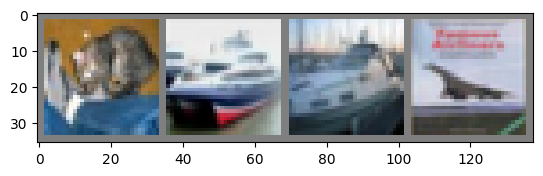

GroundTruth:    cat  ship  ship plane


In [16]:
# test our trained Neural Network on the test data. But we need to check if the
# network has learnt anything at all. We will check this by predicting the class
# label that the neural network outputs, and checking it against the ground-truth.
# If the prediction is correct, we add the sample to the list of correct predictions.

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
#  load saved model

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Наступний код використовує навчену нейромережу для здійснення передбачень (прогнозів) для зображень з першого батча навчального набору та виводить отримані передбачення. Розглянемо його крок за кроком:

1. **Використання нейромережі для передбачення**: `outputs = net(images)` - нейромережа `net` використовується для обчислення передбачень для зображень `images` з першого батча. `outputs` буде містити вектори передбачень для кожного зображення в батчі.

2. **Отримання класів з найвищою вірогідністю**: `_, predicted = torch.max(outputs, 1)` - використовуючи функцію `torch.max`, знаходяться індекси класів з найвищою вірогідністю для кожного зображення в батчі. `predicted` буде містити прогнозовані класи для кожного зображення.

3. **Виведення передбачень**: `print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))` - цей рядок виводить передбачені класи для перших чотирьох зображень у батчі. Виведені класи можуть вказати на те, як нейромережа інтерпретує та класифікує ці зображення.

Після цього коду, ми можете порівняти передбачені класи з реальними мітками для вивчення того, наскільки точно навчена модель класифікує зображення. Такий аналіз допомагає зрозуміти, як добре нейромережа виконує завдання класифікації.

In [18]:
# now let us see what our trained neural network thinks these examples above are

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car truck plane


Наступний код є частиною програми для оцінки точності нейромережі (або моделі машинного навчання) на тестових даних. Основна мета - визначити, наскільки добре модель впоралася з класифікацією зображень на тестовому наборі даних.

1. `correct = 0` та `total = 0`: Ці змінні використовуються для відстеження кількості правильних класифікацій (correct) і загальної кількості зображень (total).

2. `with torch.no_grad():`: Цей оператор вказує, що під час виконання наступних команд не потрібно зберігати градієнти для автоматичного зворотного поширення помилки (backpropagation). Це ефективно зменшує використання пам'яті і обчислювальний затрати під час тестування.

3. `for data in testloader:`: Це цикл, який проходить через тестовий набір даних. `testloader` ймовірно є об'єктом або ітератором, який надає зображення та відповідні мітки.

4. `images, labels = data`: Звернення `data` містить зображення та відповідні мітки, які розпаковуються в `images` та `labels`.

5. `outputs = net(images)`: Зображення `images` передаються через нейромережу `net`, щоб отримати прогнозовані виходи для кожного зображення.

6. `_, predicted = torch.max(outputs.data, 1)`: Тут використовується функція `torch.max()`, щоб знайти клас з найвищим значенням виходу для кожного зображення. Змінна `predicted` містить передбачені класи для кожного зображення.

7. `total += labels.size(0)`: Додає кількість зображень у пакеті до загальної кількості зображень `total`.

8. `correct += (predicted == labels).sum().item()`: Змінна `correct` збільшується на кількість вірних класифікацій у пакеті. Порівняння `(predicted == labels)` дає булевий тензор, де `True` вказує на правильну класифікацію, і потім здійснюється підсумовування булевих значень за допомогою `.sum()`, а звідти взято `.item()` для отримання числового значення.

9. На останок, `print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))`: Виводиться точність (accuracy) мережі на тестовому наборі даних у відсотках, розрахована як відношення `correct` до `total`.

Отже, цей код обчислює та виводить точність моделі на тестовому наборі даних.

In [20]:
# accuracy of our trained neural network

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Наступний код також відноситься до оцінки точності нейромережі, але вже не загальної точності на всьому тестовому наборі, а точності для кожного окремого класу. Він рахує, наскільки добре модель впоралася з класифікацією для кожного окремого класу.


1. `class_correct = list(0. for i in range(10))` та `class_total = list(0. for i in range(10))`: Ці змінні представляють собою два списки, де кожен елемент відповідає одному класу. `class_correct` буде використовуватися для відстеження кількості правильних класифікацій для кожного класу, а `class_total` - загальної кількості зображень у кожному класі.

2. `with torch.no_grad():`: Цей оператор також використовується для запобігання збереженню градієнтів під час виконання наступних команд.

3. `for data in testloader:`: Цикл обробляє тестовий набір даних, як і раніше.

4. `outputs = net(images)`: Модель використовується для отримання прогнозованих виходів.

5. `_, predicted = torch.max(outputs, 1)`: Отримання прогнозованих класів для кожного зображення.

6. `c = (predicted == labels).squeeze()`: Створення булевого тензору `c`, де `True` вказує на правильну класифікацію для кожного зображення.

7. `for i in range(4):`: Цикл, який проходить через перші 4 зображення в пакеті (можливо, для демонстраційних цілей).

8. `label = labels[i]`: Отримання мітки (класу) для поточного зображення.

9. `class_correct[label] += c[i].item()`: Додавання `1` до `class_correct[label]`, якщо класифікація була правильною для цього зображення.

10. `class_total[label] += 1`: Збільшення `class_total[label]` на `1` для підрахунку загальної кількості зображень в кожному класі.

11. Після циклу, використовується цикл `for i in range(10)` для проходу через всі класи.

12. `print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))`: Друкується точність (у відсотках) для кожного класу. `classes[i]` - назва класу, `class_correct[i]` - кількість правильних класифікацій для цього класу, а `class_total[i]` - загальна кількість зображень у цьому класі.

Цей код дозволяє нам зрозуміти, як добре модель впоралася з класифікацією для кожного окремого класу і вивести ці результати.

In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 56 %
Accuracy of  bird : 36 %
Accuracy of   cat : 33 %
Accuracy of  deer : 50 %
Accuracy of   dog : 32 %
Accuracy of  frog : 84 %
Accuracy of horse : 67 %
Accuracy of  ship : 57 %
Accuracy of truck : 61 %
